<a href="https://colab.research.google.com/github/Iffat-ilyas/DPS-Traffic-accident-challenge/blob/main/DPS-Mission%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **DPS Challenge task for AI-track: Batch No. 20**

 *Iffat Ilyas*

This notebook seeks to predict alcohol traffic accidents.





## 1.   Data Loading and Exploration

First, we connect to our GoogleDrive, where our datasets are stored. Then we load the important libraries.


In [ ]:
# Connect to GoogleDrive
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load libraries
import numpy as np
from numpy import linalg as la
import pandas as pd
import csv
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
# Change working directory to where the data is
%cd /content/drive/MyDrive/DPS-challenge


/content/drive/MyDrive/DPS-challenge


In [ ]:
# Check current working directory
!pwd

/content/drive/MyDrive/DPS-challenge


Now we will load the data which is downloaded from the following link address given by DPS hiring team.
https://opendata.muenchen.de/dataset/monatszahlen-verkehrsunfaelle/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7

In [ ]:
# Use panda to read csv file
df = pd.read_csv('data.csv')
#df = df.sort_values('label')
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [ ]:
#to see the  overview of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONATSZAHL                     2086 non-null   object 
 1   AUSPRÄGUNG                     2086 non-null   object 
 2   JAHR                           2086 non-null   int64  
 3   MONAT                          2086 non-null   object 
 4   WERT                           2002 non-null   float64
 5   VORJAHRESWERT                  1995 non-null   float64
 6   VERÄND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERÄND_VORJAHRESMONAT_PROZENT  1910 non-null   float64
 8   ZWÖLF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 146.8+ KB
None


Now we will find out how many null/NaN values the columns have.

In [ ]:
#print the missing values
print(df.isnull().sum())


MONATSZAHL                         0
AUSPRÄGUNG                         0
JAHR                               0
MONAT                              0
WERT                              84
VORJAHRESWERT                     91
VERÄND_VORMONAT_PROZENT          246
VERÄND_VORJAHRESMONAT_PROZENT    176
ZWÖLF_MONATE_MITTELWERT          238
dtype: int64


In [ ]:
#drop the rows with missing columns so we can have clean dataset
df.dropna(inplace=True)
df.head()

,MONATSZAHL,AUSPRÄGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT,ZWÖLF_MONATE_MITTELWERT
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


   Now we will find out more about the timeframe our dataset covers.

In [ ]:
# Checking the date format
df['JAHR'].head()

13    2021
14    2021
15    2021
16    2021
17    2021
Name: JAHR, dtype: int64

Our first task is to drop entries after 2020 to predict the model. So we will filter the data frame and include only entries upto 2020.

In [ ]:
# Filter the DataFrame to include only entries up to 2020
f_df = df[df['JAHR'] <= 2020]
#check the filtered data now to confirm if all entried are dropped or not
f_df['JAHR'].head()

26    2020
27    2020
28    2020
29    2020
30    2020
Name: JAHR, dtype: int64

In [ ]:
#checking one more time the earliest and latest date
earliest_date = f_df['JAHR'].min()
latest_date = f_df['JAHR'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2001
Latest Date: 2020


In [ ]:
#checking unique data
f_df['JAHR'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001])

Now we confrimed that all entries after 2020 are dropped from data so, we will check one more time for missing values, just to be sure about them.

In [ ]:
#checking null values
print(df.isnull().sum())
#f_df.head()

MONATSZAHL                       0
AUSPRÄGUNG                       0
JAHR                             0
MONAT                            0
WERT                             0
VORJAHRESWERT                    0
VERÄND_VORMONAT_PROZENT          0
VERÄND_VORJAHRESMONAT_PROZENT    0
ZWÖLF_MONATE_MITTELWERT          0
dtype: int64


No null or missing values so now we will see all unique values in each column to get better overview of dataset.

In [ ]:
#to display all the unique values in each column of the DataFrame.
for column in f_df.columns:
    unique_values = f_df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'MONATSZAHL': ['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
Unique values in column 'AUSPRÄGUNG': ['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']
Unique values in column 'JAHR': [2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001]
Unique values in column 'MONAT': ['202001' '202002' '202003' '202004' '202005' '202006' '202007' '202008'
 '202009' '202010' '202011' '202012' '201901' '201902' '201903' '201904'
 '201905' '201906' '201907' '201908' '201909' '201910' '201911' '201912'
 '201801' '201802' '201803' '201804' '201805' '201806' '201807' '201808'
 '201809' '201810' '201811' '201812' '201701' '201702' '201703' '201704'
 '201705' '201706' '201707' '201708' '201709' '201710' '201711' '201712'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '20

It appears that some columns contain numeric values e.g., WERT, VORJAHRESWERT,VERÄND_VORMONAT_PROZENT,VERÄND_VORJAHRESMONAT_PROZENT, ZWÖLF_MONATE_MITTELWERT, while others contain categorical values e.g., MONATSZAHL, AUSPRÄGUNG, MONAT. So now we will visualise our dataset.






## 2. Data Visualisation



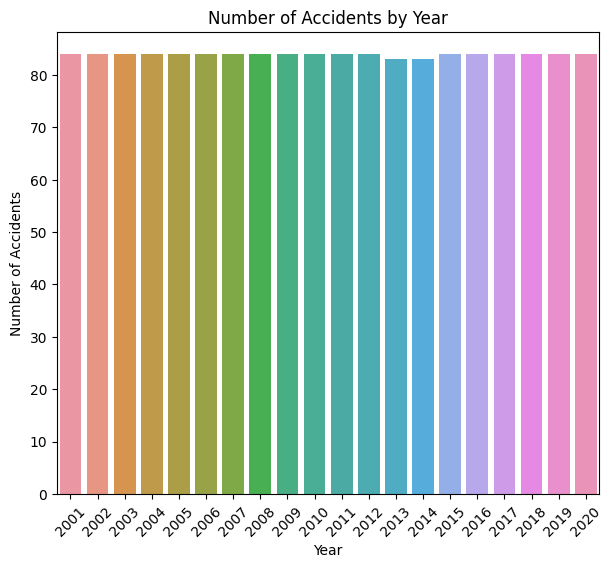

In [ ]:
#First of all to visulaise the number of accidents per year we need to group the data by 'JAHR' and calculate the count.
grouped_data = f_df.groupby('JAHR').size().reset_index(name='WERT')

# Plotting the data
plt.figure(figsize=(7, 6))
sns.barplot(x='JAHR', y='WERT', data=grouped_data)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Year')
plt.xticks(rotation=45)
plt.show()

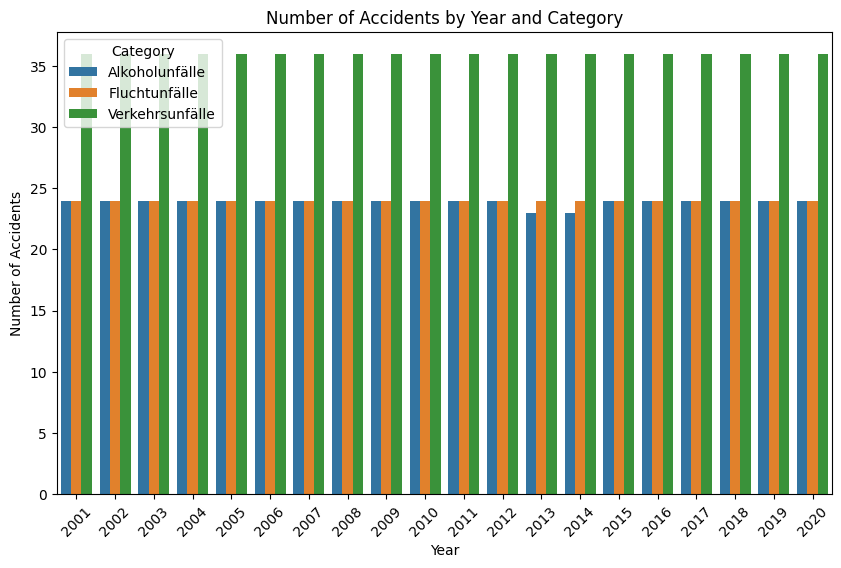

In [ ]:
#To visualise the number of accidents by year and category,
# First group the data by 'JAHR' and 'MONATSZAHL' and calculate the count
grouped_data = f_df.groupby(['JAHR', 'MONATSZAHL']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='JAHR', y='Count', hue='MONATSZAHL', data=grouped_data)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Year and Category')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

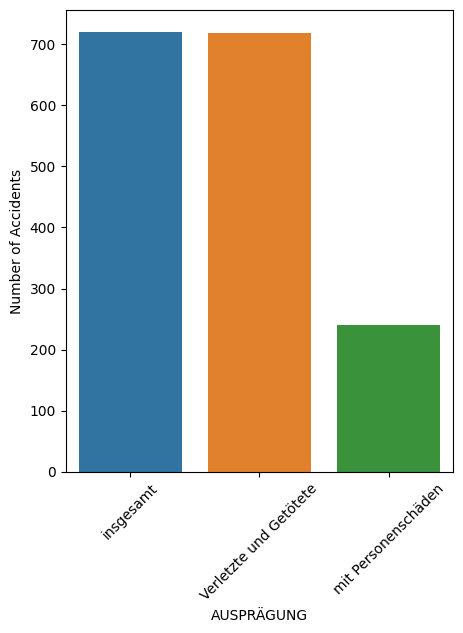

In [ ]:
#Now we will check the injuries caused by number of accidents
# Again group the data by 'AUSPRÄGUNG' (cause) and calculate the count
grouped_data = f_df.groupby('AUSPRÄGUNG').size().reset_index(name='Count')

# Sort the data by the count in descending order
grouped_data = grouped_data.sort_values(by='Count', ascending=False)

# Plotting the data
plt.figure(figsize=(5, 6))
sns.barplot(x='AUSPRÄGUNG', y='Count', data=grouped_data)
#plt.xlabel('Cause')
plt.ylabel('Number of Accidents')
#plt.title('Injuries caused by accidents')
plt.xticks(rotation=45)
plt.show()

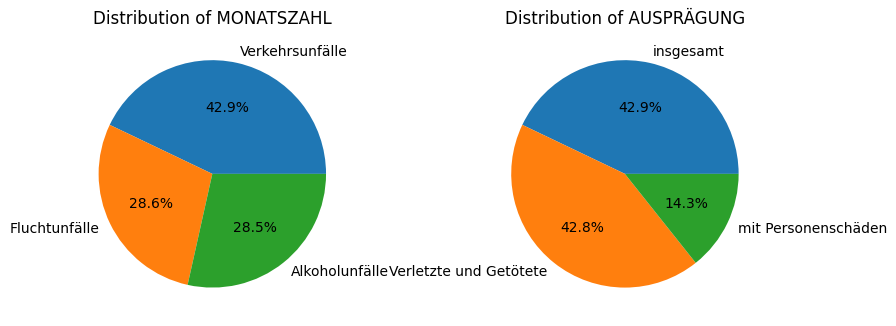

In [ ]:
#piecharts
# Plot pie charts for 'MONATSZAHL' and 'AUSPRÄGUNG'
plt.figure(figsize=(9, 10))

# Pie chart for 'MONATSZAHL'
plt.subplot(1, 2, 1)
f_df['MONATSZAHL'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of MONATSZAHL')

# Pie chart for 'AUSPRÄGUNG'
plt.subplot(1, 2, 2)
f_df['AUSPRÄGUNG'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of AUSPRÄGUNG')

plt.tight_layout()
plt.show()


Based on the given categories traffic accidents, flight accidents, alcohol accidents, the next task is to create a model that forecasts the values for alcohol incidents in 2021.

##Forest Prediction

In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# Take user input for features
category = 'Alkoholunfälle'
accident_type = 'insgesamt'
year = '2021'
month = '01'

# Prepare user input data
cat_mapping = {'Verkehrsunfälle': 0, 'Alkoholunfälle': 1, 'Fluchtunfälle': 2}
accid_mapping = {'insgesamt': 0, 'Verletzte und Getötete': 1, 'mit Personenschäden': 2}
year_encoder = LabelEncoder()
month_encoder = LabelEncoder()

category_encoded = cat_mapping.get(category, -1)
accident_type_encoded = accid_mapping.get(accident_type, -1)
year_encoded = year_encoder.fit_transform([year])[0]
month_encoded = month_encoder.fit_transform([month])[0]

# Create input data for prediction
input_data = pd.DataFrame({
    'MONATSZAHL': [category_encoded],
    'AUSPRÄGUNG': [accident_type_encoded],
    'JAHR': [year_encoded],
    'MONAT': [month_encoded]
})

# Train a new RandomForestRegressor model using the f_df DataFrame
#features = ['Category', 'Accident_type', 'Year', 'Month']
features = ['MONATSZAHL', 'AUSPRÄGUNG', 'JAHR', 'MONAT']
X = f_df[features].copy()

# Encode categorical features
X['MONATSZAHL'] = X['MONATSZAHL'].map(cat_mapping)
X['AUSPRÄGUNG'] = X['AUSPRÄGUNG'].map(accid_mapping)

# Convert numerical features to numeric data types
X['JAHR'] = X['JAHR'].astype(int)
X['MONAT'] = X['MONAT'].astype(int)

y = f_df['WERT'].astype(float)  # Convert target column to float

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make predictions
prediction = rf_model.predict(input_data)

# Display the predicted value
print(f"Predicted value: {prediction[0]}")

# Save the trained model to a file
joblib.dump(rf_model, '/content/drive/MyDrive/DPS-challenge/DPS-Model.pkl')


Predicted value: 61.92


['/content/drive/MyDrive/DPS-challenge/DPS-Model.pkl']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
prediction = rf_model.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, prediction)
mae = mean_absolute_error(y, prediction)
r2 = r2_score(y, prediction)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 4579.03787818832
Mean Absolute Error (MAE): 33.44654350417163
R-squared (R^2): 0.9967044434288065
